## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [04] : [Linear Discriminant Analysis] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-03-02 10:18:37.728928
Device ID: 	ec53de45-b8a8-11ed-9322-088fc3234331



---

### Dataset yang dipakai:

1. [Wine Quality] – sumber : [https://www.kaggle.com/datasets/yasserh/wine-quality-dataset]
2. [Diabetics prediction using logistic regression] – sumber : [https://www.kaggle.com/datasets/kandij/diabetes-dataset]

### Hasil kerja

### Data Preprocessing

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Import dataset
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [44]:
df = df.drop(['Id'], axis=1)

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Split dataset for test and train

In [46]:
# Split data for training and testing
X = df.iloc[:, :11].values
Y = df.iloc[:, 11].values

# 80% dataset split for training and the remaining 20% for tests
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Feature Scaling

In [47]:
# Jika terdapat data numerik dengan perbedaan value yang cukup jauh (ada yg sangat besar valuenya, ada yg sangat kecil)
# contohnya seperti data Age dan Salary, maka akan menimbulkan masalah ketika membuat sebuah model
# sehingga diperlukan Normalisasi data, bisa menggunakan Normalize dan Standard Scaler

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Build Linear Discriminant Analysis for Dimensionality Reduction

#### Import Libraries

In [48]:
# Import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### Initialize model

In [49]:
# we use the number of components = 2 which have high covariance
lda = LDA(n_components = 2)

#### Fitting the Model

In [50]:
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

### Modeling

#### Import Libraries

In [51]:
# Import Logistic Regression model from sklearn using the 2 variances with the help of LDA

from sklearn.linear_model import LogisticRegression

#### Initialize our Logistic Regression Model

In [52]:
LG = LogisticRegression(random_state=0)

#### Fitting the Model

In [53]:
LG.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Make Prediction

In [54]:
y_pred = LG.predict(X_test)

#### Confusion Metrix

<AxesSubplot:>

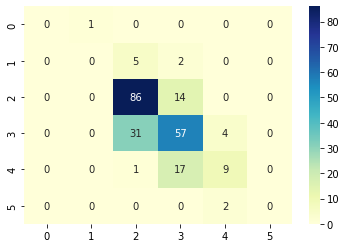

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

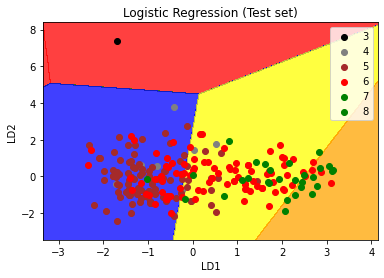

In [59]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'yellow', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'grey', 'brown', 'red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Hasil Kerja dengan Dataset 2

In [16]:
 # import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("diabetes2.csv")
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Split the dataset for test and train

In [17]:
X2 = df2.iloc[:, :8].values
Y2 = df2.iloc[:, 8].values

In [37]:
df2.iloc[:, :8].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

#### Feature Scaling

In [20]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

#### Building a Linear Discriminant analysis for Dimensionality Reduction

In [23]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# n_components = jumlah class pada target variable - 1
# pada dataset ini terdapat 2 class pada target variable, sehingga n_components = 1
lda = LDA(n_components = 1)

#### Fitting the Model

In [24]:
X2_test = lda.fit_transform(X2_test, y2_test)
X2_train = lda.transform(X2_train)

#### Initialize our Logistic Regression model

In [25]:
from sklearn.linear_model import LogisticRegression
LG =LogisticRegression(random_state=0)

In [26]:
# fit the Logistic Regression model
LG.fit(X2_train, y2_train)

LogisticRegression(random_state=0)

#### Predict the test set Result

In [27]:
# predict the Logistic regression model
y2_pred = LG.predict(X2_test)

#### Confusion Metric

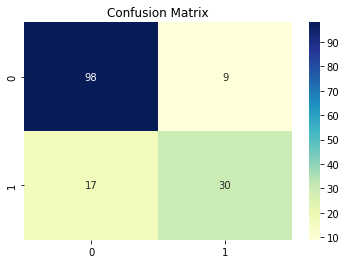

In [28]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.axes()
confusion_matrix = confusion_matrix(y2_test, y2_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('Confusion Matrix')
plt.show()

#### Visualize our Test Set Result

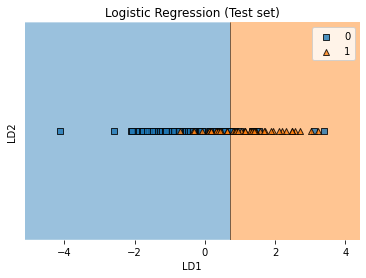

In [39]:
# Visualising the Test set results
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X2_test), np.array(y2_test), 
                      clf=LG, 
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Antara dataset 1 dan 2 memiliki perbedaan pada target variable di mana dataset 1 memiliki 6 jumlah class, sementara dataset 2 memiliki 2 jumlah class.
    - Melalui lab minggu ini, saya belajar banyak tentang Linear Discriminant Analysis untuk Dimensionality Reduction dan melakukan klasifikasi data menggunakan logistic regression.

In [60]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Rendy Wirawan Tamrin
NIM: 	00000053580
Time-stamp:	2023-03-08 23:11:18.904159


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [61]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week04.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week04.ipynb to html
[NbConvertApp] Writing 711510 bytes to IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week04.html
